In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

In [2]:
df = pd.read_csv('../data.csv')

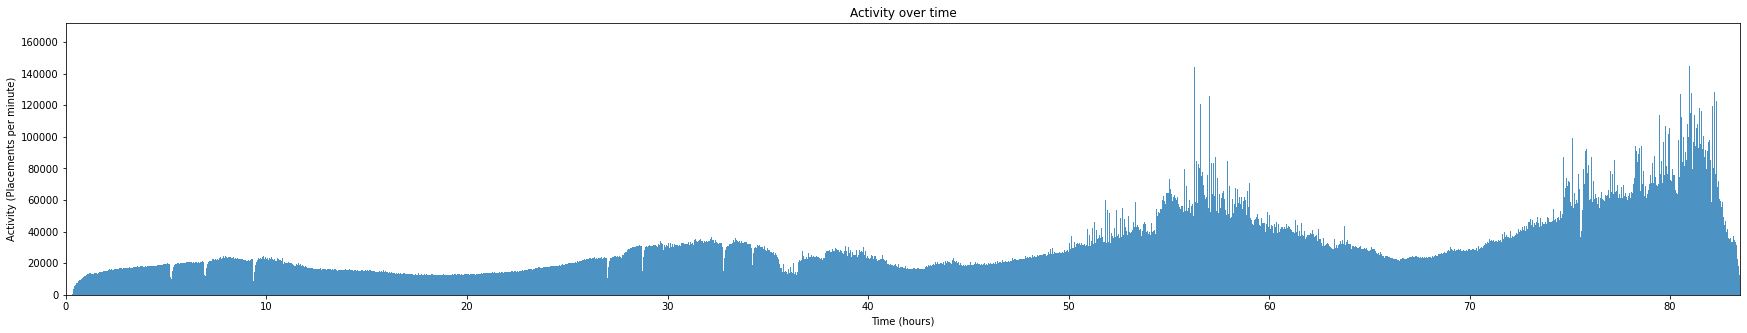

In [3]:
# Activity over time
t = np.arange(0, (df['unix'][len(df)-1] - df['unix'][0])/1e3/60/60, step=1/60)

fig, ax = plt.subplots(figsize=(30, 5));

ax.hist((df['unix'].values - df['unix'][0])/1e3/60/60, color='tab:blue', alpha=0.8, bins=t);
ax.set_xlabel('Time (hours)');
ax.set_ylabel('Activity (Placements per minute)');
ax.set_title('Activity over time');
ax.set_xlim(0, t.max());

In [4]:
# Compute the activity over time for each color in the 'color' column

In [5]:
hist_list = []
t = np.arange(0, (df['unix'][len(df)-1] - df['unix'][0])/1e3/60/60, step=1/60)

for color in tqdm(sorted(df['color'].unique())):
    df_color = df[df['color'] == color]
    df_color = df_color.sort_values(by='unix')
    df_color = df_color.reset_index(drop=True)
    hist_list.append(np.histogram((df_color['unix'].values - df['unix'][0])/1e3/60/60, bins=t)[0])

hist_list = np.array(hist_list)

100%|██████████| 32/32 [00:25<00:00,  1.24it/s]


In [6]:
# Read the color map file
color_map = pd.read_csv('../maps/color_map.csv')

# Create a dict mapping the 'pixel_color_int' column to the 'pixel_color' column
color_map_dict = dict(zip(color_map['pixel_color_int'], color_map['pixel_color']))

In [7]:
relative_hist_list = hist_list / hist_list.sum(axis=0).clip(min=1e-10)

100%|██████████| 32/32 [00:00<00:00, 1882.09it/s]


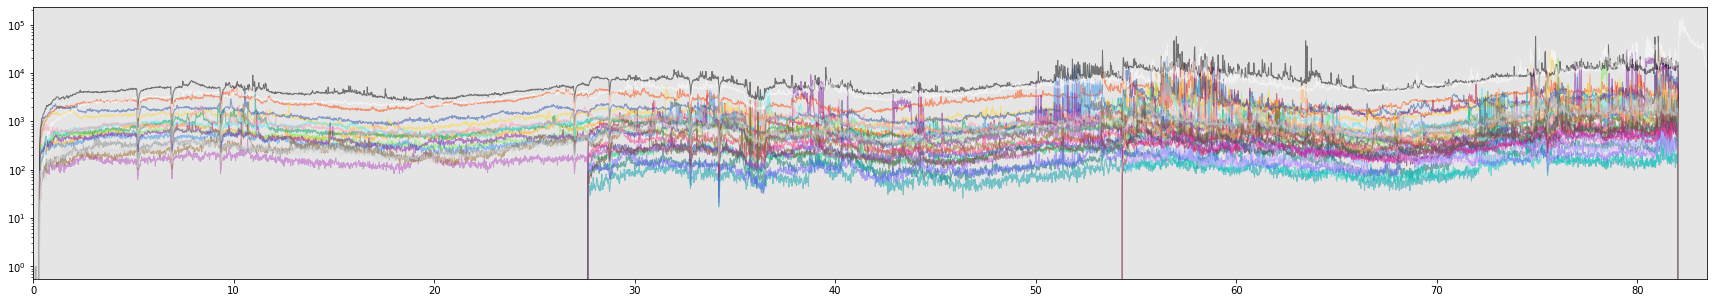

In [8]:
# Plot the activity over time for each color
fig, ax = plt.subplots(figsize=(30, 5));
ax.set_facecolor('#e5e5e5');
for i, color in enumerate(tqdm(sorted(df['color'].unique()))):
    ax.plot(t[:-1], hist_list[i], color=color_map_dict[color], alpha=0.5, linewidth=1);

ax.set_yscale('log');
ax.set_xlim(0, t.max());

### Entropy

In [9]:
# Calculate the sequence of activity time intervals
activity_times_sequence = np.diff(df['unix'])

In [10]:
# Determine the unique activity time intervals
unique_activity_time_diffs = np.unique(activity_times_sequence)

f'There are {len(unique_activity_time_diffs)} unique activity time intervals.'

'There are 352 unique activity time intervals.'

In [11]:
# Compute the probability of each unique activity time intervals
unique_activity_time_probs = np.array([
    np.sum(activity_times_sequence == unique_activity_time_diff) / len(activity_times_sequence)
    for unique_activity_time_diff in tqdm(unique_activity_time_diffs)
])

100%|██████████| 352/352 [01:25<00:00,  4.11it/s]


In [12]:
# Compute the entropy of the sequence of activity times
entropy = -np.sum(unique_activity_time_probs * np.log(unique_activity_time_probs))

f'The entropy of the sequence of activity times intervals is {entropy:.2f} bits.'

'The entropy of the sequence of activity times intervals is 1.81 bits.'

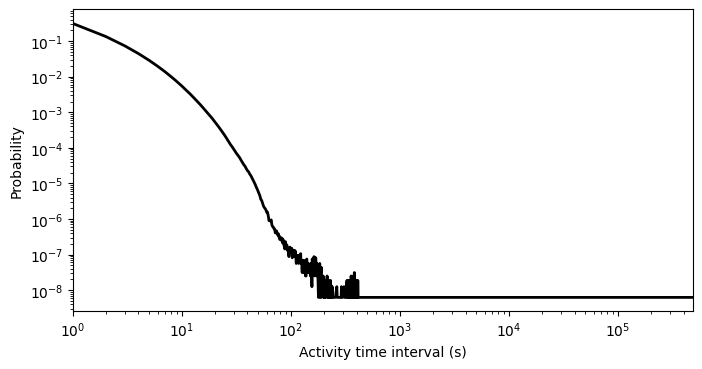

In [13]:
# Plot the unique activity time intervals' probability against the unique activity times
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax.plot(unique_activity_time_diffs, unique_activity_time_probs, '-', color='k', linewidth=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1, np.max(unique_activity_time_diffs));
ax.set_xlabel('Activity time interval (s)')
ax.set_ylabel('Probability');